# Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data

In [8]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/lazyprogrammer/data/ecommerce_data.csv', header='infer')

if df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {df.isna().sum().max()} NAs' )

print(df.info())
df.head(10)

There is no NA values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is_mobile             500 non-null    int64  
 1   n_products_viewed     500 non-null    int64  
 2   visit_duration        500 non-null    float64
 3   is_returning_visitor  500 non-null    int64  
 4   time_of_day           500 non-null    int64  
 5   user_action           500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB
None


,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2
5,1,1,0.512447,1,1,2
6,0,0,1.440327,1,1,0
7,1,0,0.035260,0,3,0
8,0,1,1.490764,0,0,1
9,0,0,0.005838,1,3,0


In [ ]:
df = df[df['user_action'] <= 1]
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is_mobile             398 non-null    int64  
 1   n_products_viewed     398 non-null    int64  
 2   visit_duration        398 non-null    float64
 3   is_returning_visitor  398 non-null    int64  
 4   time_of_day           398 non-null    int64  
 5   user_action           398 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 21.8 KB
None


,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
6,0,0,1.440327,1,1,0
7,1,0,0.035260,0,3,0
8,0,1,1.490764,0,0,1
9,0,0,0.005838,1,3,0
11,0,0,0.955889,0,3,0
12,1,0,0.159378,0,0,0
13,1,2,0.769272,0,3,1


# Utils

In [ ]:
def normalize(x):
  return (x - x.mean()) / x.std()

In [ ]:
def forward(X, W, b):
  Wb = np.concatenate((W, np.array([b])))
  X2 = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
  return sigmoid(X2.dot(Wb))

def classification_rate(y_true, preditions):
  return np.mean(y_true == preditions)

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cross_entropy(Y_true, predictions):
  filter_true_1 = Y_true == 1
  return -1 * ( np.sum(np.log(predictions[filter_true_1])) + np.sum(np.log(1 - predictions[~filter_true_1])) )

In [ ]:
def gradient_descent_step(df, x, step_size):
  return x - step_size * df(x)

def gradient_descent(f, df, x0, step_size, numer_of_steps, treshold=None, should_trace_steps=None, should_plot=False):
  x = x0
  x_hist = [x]
  f_hist = [f(x0)]
  
  if (should_trace_steps is not None):
    print(f'Step 0. Starting point is {x0} and initial function value is {f(x0)}')
  
  if (should_plot):
    steps_hist = [0]

  for step in range(numer_of_steps):
    x_new = gradient_descent_step(df, x, step_size)
    f_new = f(x_new)
    if (should_trace_steps is not None):
      if ((step+1) % should_trace_steps == 0):
        print(f'Step {step+1}. At {x_new} function value is {f_new}')
    
    f_hist.append(f_new)

    if (should_plot):
      steps_hist.append(step+1)
    
    if (treshold is not None):
      change = np.abs(f_new - f(x))
      if (change < treshold):
        print(f'Early stop after {step+1} steps because change in step {change} is smaller than treshold {treshold}')
        x = x_new 
        break
   
    x_hist.append(x_new)
    x = x_new 


  if (should_trace_steps is not None):
    print(f'Loop finished with trained parameters at {x} and function value is {f(x)}')
  
  if (should_plot):
    plt.figure(figsize=(20,10))
    plt.plot(steps_hist, f_hist);
    plt.title('Cost fuction history');

  return x, np.array(x_hist), np.array(f_hist)

# Pre-processing

In [ ]:
def normalize_n_products_viewed(X):
  X[:,1] = normalize(X[:,1])
  X[:,2] = normalize(X[:,2])
  return X


def encode_time_of_day(X):
  N = X.shape[0]
  D1 = X.shape[1] - 1
  D2 = len(set(X[:,-1]))
  X_new = np.zeros((N, D1 + D2))
  X_new[:, :D1] = X[:, :-1]
  X_new[range(N), D1 + X[range(N), -1].astype(int)] = 1
  return X_new


def filter_data_by_user_action(X, y):
  N = X.shape[0]
  D1 = X.shape[1] - 1
  D2 = len(set(X[:,-1]))
  X_new = np.zeros((N, D1 + D2))
  X_new[:, :D1] = X[:, :-1]
  X_new[range(N), D1 + X[range(N), -1].astype(int)] = 1
  return X_new

In [ ]:
X = df.drop(columns=['user_action']).values
X = normalize_n_products_viewed(X)
X = encode_time_of_day(X)

y = df['user_action'].values

print('Example of X:', X[:4,:])
print('Corresponding y:', y[:4])

Example of X: [[ 1.         -0.67398867 -0.27476744  0.          0.          0.
   0.          1.        ]
 [ 1.          0.46265324 -0.37446708  0.          0.          0.
   1.          0.        ]
 [ 1.         -0.67398867 -0.96447376  1.          0.          1.
   0.          0.        ]
 [ 0.         -0.67398867  0.60276477  1.          0.          1.
   0.          0.        ]]
Corresponding y: [0 1 0 0]


# Predictions

## Random weights

In [ ]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

y_log_odds = forward(X, W, b)
print('Corresponding predicted log odds:', y_log_odds[:4])

y_hat = np.round(y_log_odds).astype(int)
print('Corresponding predicted classes:', y_hat[:4])

print('Full set classification score:', classification_rate(y, y_hat))

Corresponding predicted log odds: [0.16188497 0.4913378  0.21945611 0.21102297]
Corresponding predicted classes: [0 0 0 0]
Full set classification score: 0.8266331658291457


## Gradient descene learning

In [ ]:
w0 = np.random.randn(D + 1)
Xb = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

Xb_train, Xb_test, y_train, y_test = train_test_split(Xb, y, test_size=0.2)

cost = lambda  w: 1/len(y_train) * cross_entropy(y_train, sigmoid(Xb_train.dot(w)))
dcost = lambda  w: -1/len(y_test) * Xb_train.T.dot(y_train - sigmoid(Xb_train.dot(w)))

print('Initial value for trained weigths:', w0)
w_gd, w_hist, f_hist = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=1000, treshold=None, should_trace_steps=50, should_plot=False)

Initial value for trained weigths: [ 1.14163537  0.61669169 -0.95559422  0.10770933  0.72392613 -0.58144271
 -0.60403464 -1.72621413 -0.60734767]
Step 0. Starting point is [ 1.14163537  0.61669169 -0.95559422  0.10770933  0.72392613 -0.58144271
 -0.60403464 -1.72621413 -0.60734767] and initial function value is 1.4795658342170663
Step 50. At [ 0.30785589  0.14610848  2.39247514 -0.21587595  0.29657885 -0.93423028
 -1.24446585 -1.22260279 -0.95151973] function value is 0.23376020288313717
Step 100. At [ 0.26722638  0.21848446  3.24654444 -0.079191    0.42904719 -0.94887391
 -1.39099555 -1.0455856  -1.00799309] function value is 0.190606069377955
Step 150. At [ 0.20034044  0.2924671   3.72738367  0.02631117  0.54355268 -0.93245006
 -1.47763843 -0.99291451 -1.0573311 ] function value is 0.17642104243414525
Step 200. At [ 0.1285792   0.36522643  4.04833434  0.1029904   0.64578625 -0.90736653
 -1.53783239 -0.98405564 -1.10284078] function value is 0.16952920652129483
Step 250. At [ 0.058939

In [ ]:
cost2 = lambda  X, y, w: 1/len(y) * cross_entropy(y, sigmoid(X.dot(w)))

L_train_hist = []
L_test_hist = []
L1 = []
for w in w_hist:
  L_train_hist.append(cost2(Xb_train, y_train, w))
  L_test_hist.append(cost2(Xb_test, y_test, w))
  L1.append(cost(w))


y_train_pred = sigmoid(Xb_train.dot(w_gd))
y_test_pred = sigmoid(Xb_test.dot(w_gd))

print('Train cross enthropy loss:', L_train_hist[-1])
print('Test cross enthropy loss:', L_test_hist[-1])

print('Train classification score:', classification_rate(y_train, np.round(y_train_pred).astype(int)))
print('Test classification score:', classification_rate(y_test, np.round(y_test_pred).astype(int)))

Train cross enthropy loss: 0.1537396101635932
Test cross enthropy loss: 0.30627265205762694
Train classification score: 0.9716981132075472
Test classification score: 0.9625


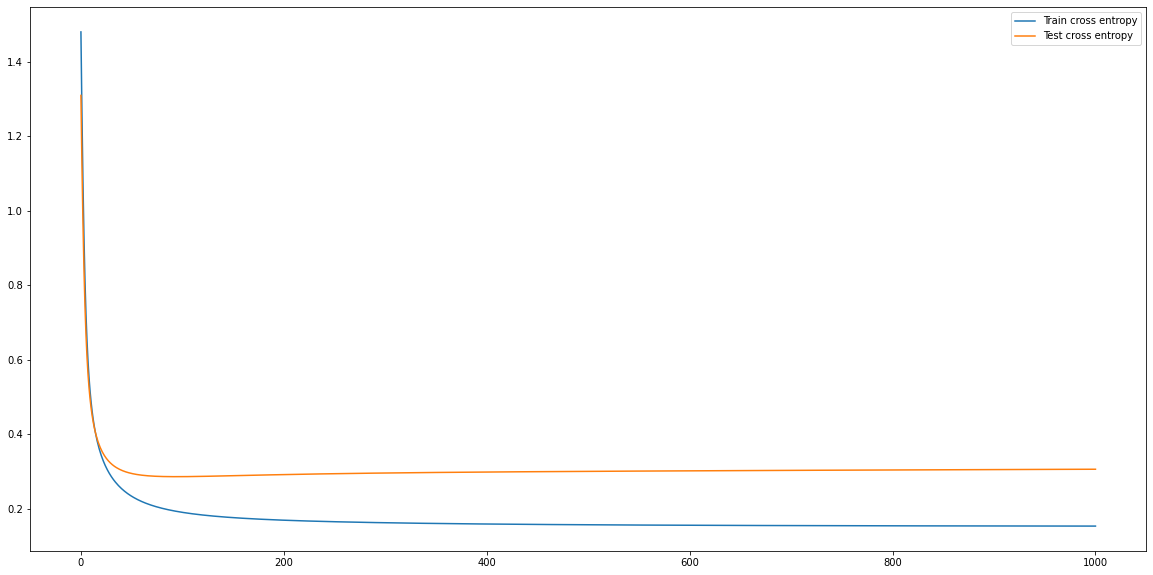

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(L_train_hist, label='Train cross entropy')
plt.plot(L_test_hist, label='Test cross entropy')
plt.legend();